# Control theory. Course introduction.

## TP1. System modeling. State-space representation of dynamical systems.

## Study load

Course grade breakdown:

    Labs - 40%
    
    Final project presentation 30%

    Final test 30%
    
File name for lab submission: yourname_labnumber.ipynb (example: elenavanneaux_TP1.ipynb)    

The completed notebooks should be **submitted via the corresponding Moodle assignments before the beginning of the next session.**

## Prerequisites for practice
### Math
During the course, we will cover the following areas of mathematics:
    
    1. Linear Algebra

    2. Calculus

    3. Differential equations

    4. Dynamics (Mechanics and Physics)

### Python programming
In the labs we will use a Python programming language and the following libraries:

    1. NumPy https://numpy.org/doc/stable/

    2. SciPy https://docs.scipy.org/doc/scipy/

    3. Matplotlib https://matplotlib.org/stable/tutorials/index

    4. SymPy https://docs.sympy.org/latest/tutorials/intro-tutorial/intro.html

### Jupyter Notebook Markdown Cells Documentation

Please check on Markdown cells documentation, to provide a fancy look for your notebooks!

https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html

## Ex.1: Vehicle Suspension System

Vehicle Suspension System

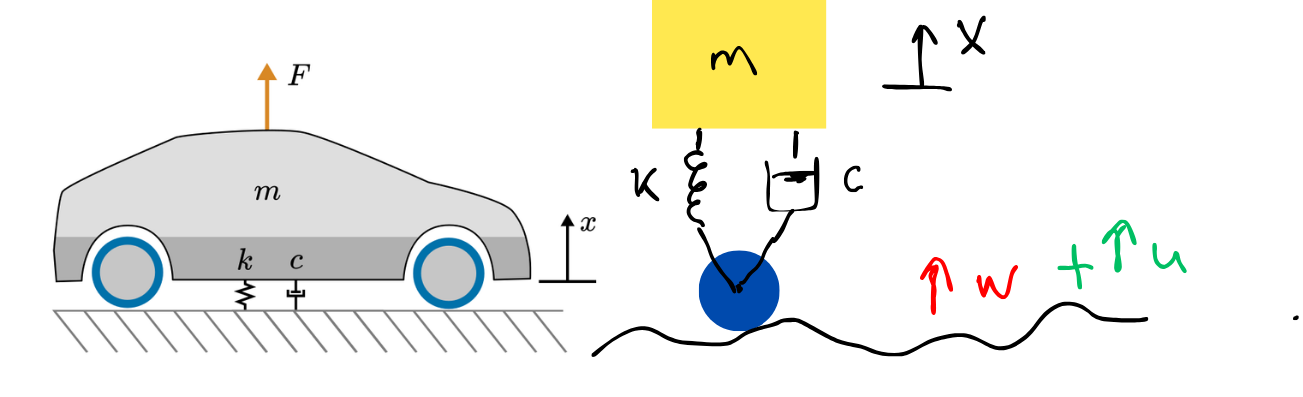

with the following system parameters:

    (m) mass 1.0 kg

    (k) spring constant 5.0 N/m

    $(c)$ damping constant 2 Ns/m

### **Equation of Motion:**

For a mass-spring-damper system, the equation of motion can be derived using Newton's second law or by applying the principles of dynamics. The general form of the equation is:

$$
m \frac{d^2x}{dt^2} + c \frac{dx}{dt} + kx = u + w
$$

### **State-Space Representation:**

To convert the second-order differential equation into a system of first-order differential equations, we introduce the following state variables:
- Let $ x_1 = x $ (position),
- Let $ x_2 = \dot x $ (velocity).

The system becomes:

$$\dot x = Ax+Bu+Dw$$

where
state vector $x = (position, velocity)$, and state and control matrices are the following:
$$ A = \begin{pmatrix} 0&1\\ -\frac{k}{m}&-\frac{c}{m}\end{pmatrix},\ B = \begin{pmatrix} 0\\ \frac{1}{m} 
\end{pmatrix},\ D =\begin{pmatrix} 0\\ \frac{1}{m} 
\end{pmatrix}$$

## TODO

Today we will study the dynamic of a passive suspension system, i.e. we assume that there is no active control ($u =0,$ for all $t>0$). 

1. Check on the code below, what kind of situation does it model?

R: System mass-spring-dumper

Modify the code below to analyse how the suspension system will work on different roads.

2. Let disturbance input $w(t)$ be given by a step function
    $$w = \left\{\begin{aligned}
        &0, \quad t <3.0\\
        &1.0,  \quad 3.0 \leq t < 7.0\\
        &0,  \quad t \geq 7
    \end{aligned}\right.$$
   How will it affect the behavior of the system? What kind of road scenario is modeled with step function disturbance?

   R: We can see the change of the behavior of the system in the graphic bellow. The step can be whole in the road between t1 and t2
3. How will the system behavior change when we assume that there is no damper in the system (i.e., c=0)?

R: With no dumper in the system, it will follow the input of the road 
4. Now assume that the system is disturbed by a sinusoidal input $w = sin(t)$.
   How will it affect the behavior of the system? What kind of road profile does a sinusoidal input describe?

   R: We can see the change of the behavior of the system in the graphic bellow. It can represent an ondulation through the the road during an especific time

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# x is a state vector, t is a current time, A is a dynamic matrix, B is a control matrix, D is a disturbance matrix, 
# u_func(t) is a control input, w_func(t) is a disturbance input 
def StateSpace(x, t, A, B, D, u_func, w_func):
    w = w_func(t)
    u = u_func(t)
    # Flatten u and w for proper matrix operations
    return np.dot(A, x) + np.dot(B, u).flatten() + np.dot(D, w).flatten()

# OpenLoopInputOutputSystem with time-dependent w(t)
def OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_func, T, x0):
    # Solve the ODE system with odeint, passing the time-dependent w function
    solution = odeint(StateSpace, x0, T, args=(A, B, D, u_func, w_func))
    # Output calculation using C and the solution
    return (C @ solution.T)    

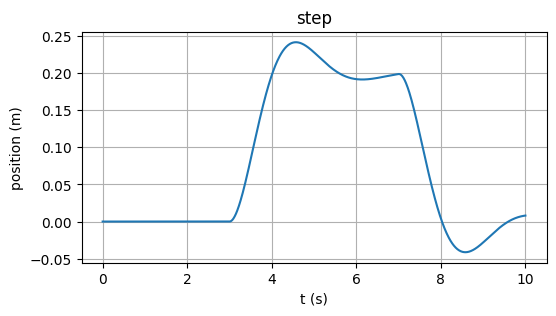

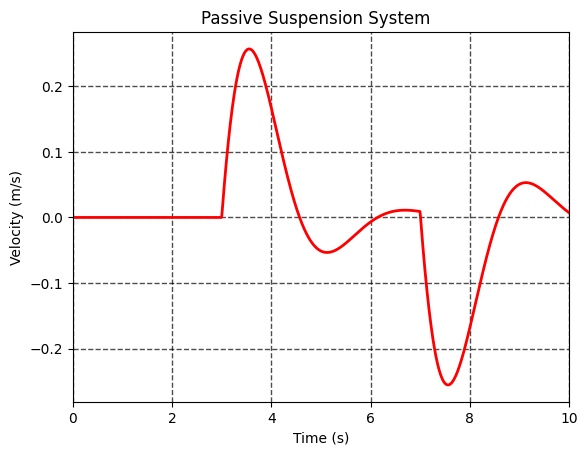

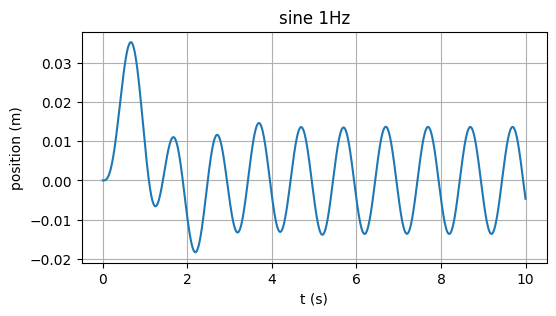

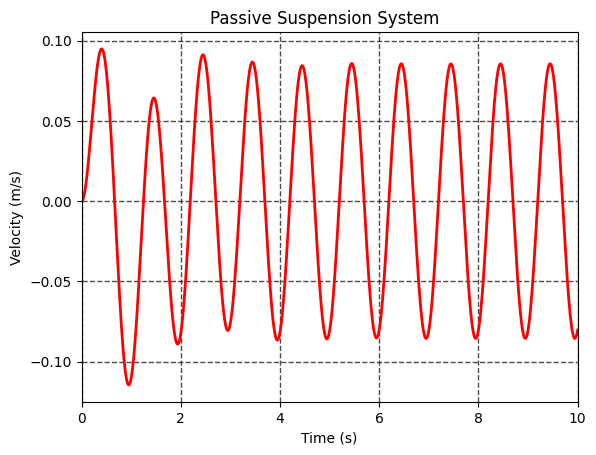

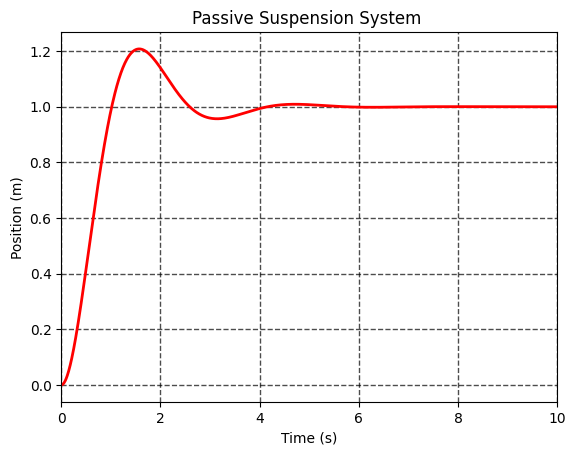

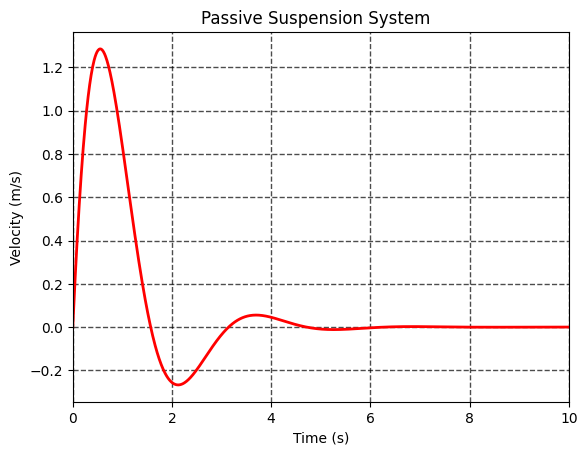

In [2]:
# System parameters
m = 1
k = 5
c = 2
g = 9.8

A = np.array([[0, 1],
              [-k/m, -c/m]])  # Corrected c instead of rho

B = np.array([[0],
              [1/m]])  # Reshaped to column vector

D = np.array([[0],
              [1/m]])  # Reshaped to column vector

C = np.array([[1, 0],[0,1]])  # Output matrix

R = np.array([0])

# flatten() to convert to 1D array since scipy.integrate.odeint requires the state vector (x) to have shape (n,), not (n,1).
x0 = np.array([0, 0]).flatten() # Initial state

# Time settings
t0 = 0  # Initial time 
tf = 10  # Final time
T = np.linspace(t0, tf, 1000)  # Time vector

def w_func(t):
    return 5.0 # Disturbance input
    
def u_func(t):
    return 0.0 # Control input

# 1) Step (buraco/obstáculo entre t1 e t2)
def w_step(t, t1=3.0, t2=7.0, amp=1.0):
    return amp if (t1 <= t < t2) else 0.0

# 2) Seno (ondulação periódico da estrada)
def w_sine(t, freq=1.0, amp=0.5):
    return amp * np.sin(2*np.pi*freq*t)



scenarios = {
    'step': lambda t: w_step(t, 3, 7, 1.0),
    'sine 1Hz': lambda t: w_sine(t, freq=1.0, amp=0.5),
}

for name, wfun in scenarios.items():
    y = OpenLoopInputOutputSystem(A,B,D,C,R,u_func,wfun,T,x0)
    plt.figure(figsize=(6,3))
    plt.plot(T, y[0,:], label='position')
    plt.title(name)
    plt.grid(True)
    plt.xlabel('t (s)')
    plt.ylabel('position (m)')
    plt.show()

    plt.plot(T, y[1,:], linewidth=2.0, color='red')
    plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
    plt.xlim([t0, tf])
    plt.ylabel(r'Velocity (m/s)')
    plt.xlabel('Time (s)')
    plt.title('Passive Suspension System  ')
    plt.show()




# Compute system response
y = OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_func, T, x0)

# Plot the response
plt.plot(T, y[0,:], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Position (m)')
plt.xlabel('Time (s)')
plt.title('Passive Suspension System ')
plt.show()

plt.plot(T, y[1,:], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Velocity (m/s)')
plt.xlabel('Time (s)')
plt.title('Passive Suspension System  ')
plt.show()

## Ex.2: DC Motor Speed: System Modeling

A common actuator in control systems is the DC motor. It directly provides rotary motion and, coupled with wheels or drums and cables, can provide translational motion. The electric equivalent circuit of the armature and the free-body diagram of the rotor are shown in the following figure.

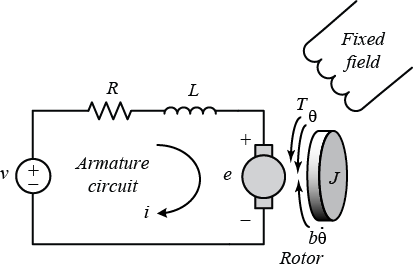

For this example, we will assume that the input of the system is the voltage source ($V$) applied to the motor's armature, while the output is the rotational speed of the shaft $\dot{\theta}$. The rotor and shaft are assumed to be rigid. We further assume a viscous friction model, that is, the friction torque is proportional to shaft angular velocity. We will assume that the magnetic field is constant and, therefore, that the motor torque is proportional (with constant $K_t$) to only the armature current. Let us remark that in SI units the motor torque and back emf constants are equal, that is, $K_t = K_e$.

The physical parameters for our example are:

    (J)   moment of inertia of the rotor     0.01 kg.m^2

    (b)     motor viscous friction constant    0.1 N.m.s

    (Ke)    electromotive force constant       0.01 V/rad/sec

    (Kt)    motor torque constant              0.01 N.m/Amp

    (R)     electric resistance                1 Ohm

    (L)     electric inductance                0.5 H

## TODO
1. Let us assume that the state vector is $x = (w,i)$ where $w = \dot\theta$ is an angular velocity of the motor. Derive the state space equations of the system. Is the system linear?
2. Rewrite the system equations in canonical first order ODE system form.
3. Simulate the output of the system corresponding to uncontrolled system (i.e V = 0) and a random initial position.
4. Let's assume that the motor is off. How will the system's behavior change if we apply 15 volts as an input?


## Answers DC MOTOR:

1) the derived spce equations are: 
$$\begin{cases} \dot{\omega} = -\frac{b}{J}\omega + \frac{K_t}{J}i \\ \dot{i} = -\frac{K_e}{L}\omega - \frac{R}{L}i + \frac{1}{L}V \end{cases}$$

Yes, the system is lenear because the the state equation variables (i,w) and the input (V) are in a linear form (multiplied only by constants, without terms like $\omega^2$ or $\sin(\omega)$)



2) $$\begin{bmatrix} \dot{\omega} \\ \dot{i} \end{bmatrix} = \underbrace{\begin{bmatrix} -b/J & K_t/J \\ -K_e/L & -R/L \end{bmatrix}}_{A} \begin{bmatrix} \omega \\ i \end{bmatrix} + \underbrace{\begin{bmatrix} 0 \\ 1/L \end{bmatrix}}_{B} V$$

![WhatsApp Image 2026-02-05 at 11.57.31.jpeg](<attachment:WhatsApp Image 2026-02-05 at 11.57.31.jpeg>)


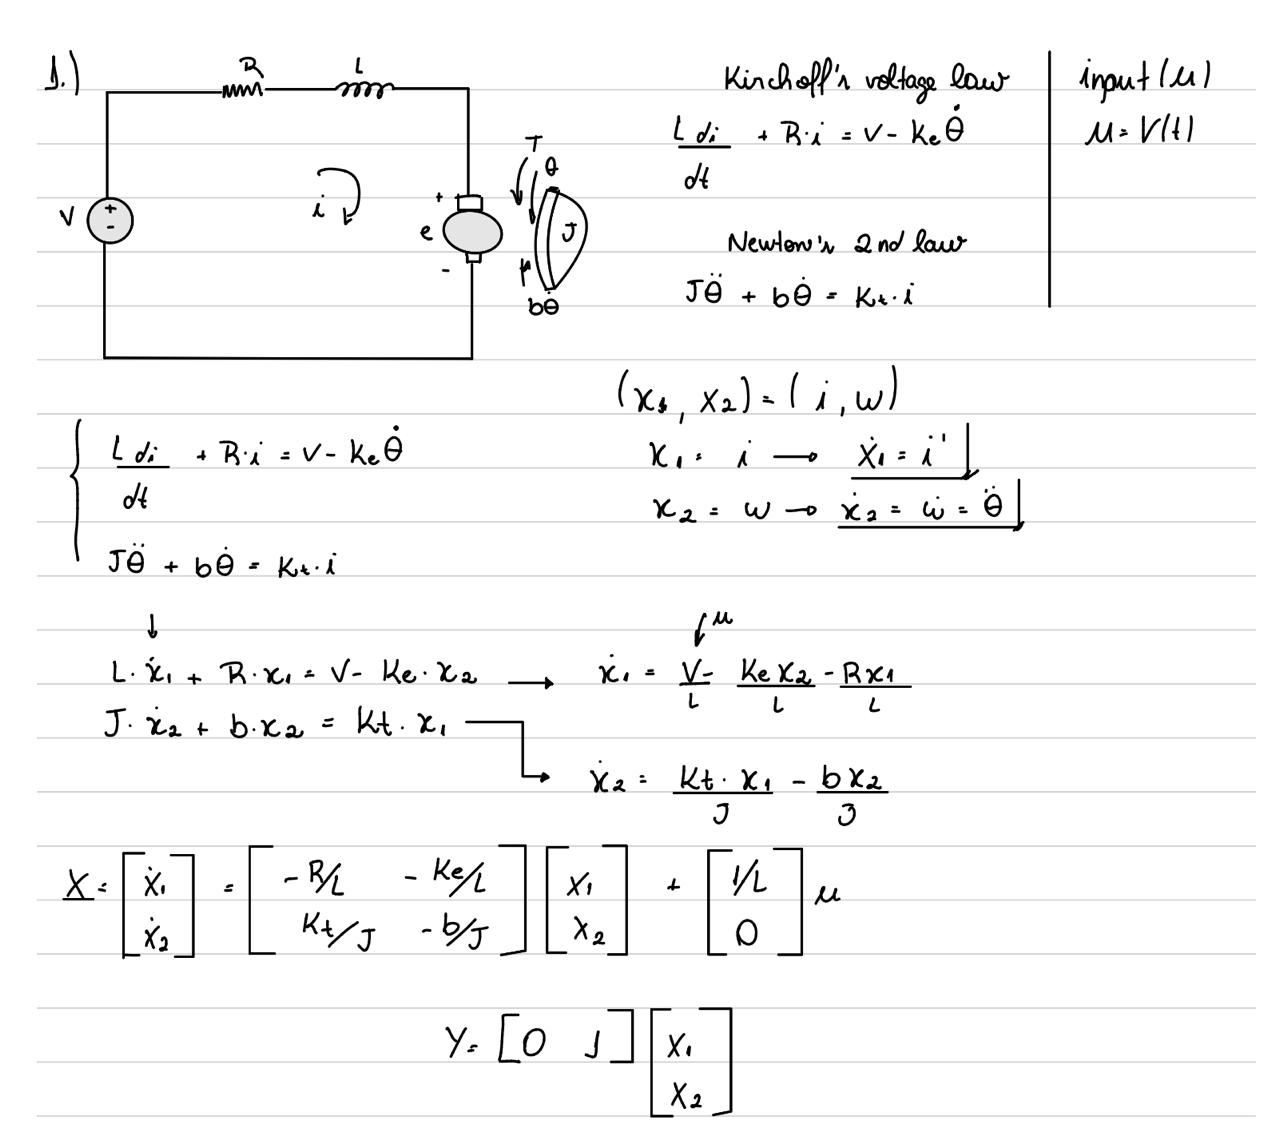

<>:50: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
<>:50: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
/tmp/ipykernel_26590/3048129933.py:50: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
  plt.plot(T, y[0,:], linewidth=2.0, color='blue', label='velocity $\omega(t)$')


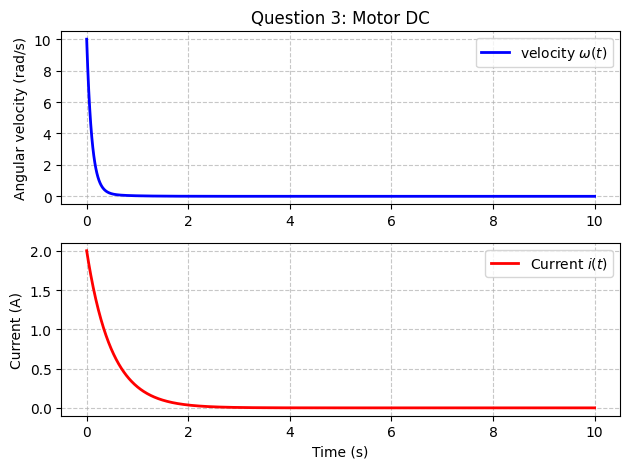

In [9]:
#3) 
# System parameters

J = 0.01
b = 0.1
Ke = 0.01
Kt = 0.01
R = 1
L = 0.5


A = np.array([[-b/J,  Kt/J],
              [-Ke/L, -R/L]])

B = np.array([[0],
              [1/L]])


C = np.array([[1, 0],[0,1]])  # Output matrix

D = np.array([[0], [0]])

# random initial position
x0 = [10,2] # Initial state

# Time settings
t0 = 0  # Initial time 
tf = 10  # Final time
T = np.linspace(t0, tf, 1000)  # Time vector


    
def u_func(t):
    return 0.0 # Control input

def w_func(t):
    return 0.0 # Disturbance input

# 1) Step 
def w_step(t, t1=3.0, t2=7.0, amp=1.0):
    return amp if (t1 <= t < t2) else 0.0



# Compute system response
y = OpenLoopInputOutputSystem(A, B, D, C, 0, u_func,w_func, T, x0)

# Gráfico da Velocidade Angular (Omega)
plt.subplot(2, 1, 1)
plt.plot(T, y[0,:], linewidth=2.0, color='blue', label='velocity $\omega(t)$')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Angular velocity (rad/s)')
plt.title('Question 3: Motor DC')
plt.legend()

# Gráfico da Corrente (i)
plt.subplot(2, 1, 2)
plt.plot(T, y[1,:], linewidth=2.0, color='red', label='Current $i(t)$')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Current (A)')
plt.xlabel('Time (s)')
plt.legend()

plt.tight_layout()
plt.show()


<>:13: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
<>:13: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
/tmp/ipykernel_26590/1181425991.py:13: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
  plt.plot(T, y[0,:], linewidth=2.0, color='blue', label='velocity $\omega(t)$')


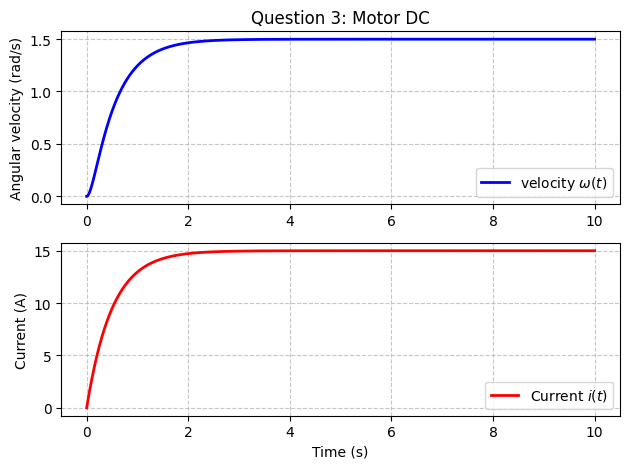

In [10]:
#Q4
def u_func(t):
    return 15.0 # Aplica 15V constantes

#motor is off
x0 = [0, 0] # Initial state

# Compute system response
y = OpenLoopInputOutputSystem(A, B, D, C, 0, u_func,w_func, T, x0)

# Gráfico da Velocidade Angular (Omega)
plt.subplot(2, 1, 1)
plt.plot(T, y[0,:], linewidth=2.0, color='blue', label='velocity $\omega(t)$')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Angular velocity (rad/s)')
plt.title('Question 3: Motor DC')
plt.legend()

# Gráfico da Corrente (i)
plt.subplot(2, 1, 2)
plt.plot(T, y[1,:], linewidth=2.0, color='red', label='Current $i(t)$')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Current (A)')
plt.xlabel('Time (s)')
plt.legend()

plt.tight_layout()
plt.show()

## Ex.3: Pendulum

Let us now consider the pendulum example from the lecture.

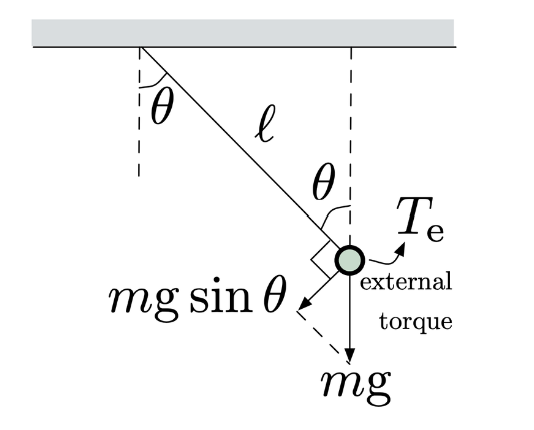

Using the free body diagram we can derive the following equation of motion.
$$ml^2*\ddot \theta = -m*g*\sin(\theta)*l +T_e$$

we then rewrite it in the canonical form
$$
\begin{aligned}
&\dot\theta_1 = \theta_2\\
&\dot\theta_2 =  -\frac{g}{l}*\sin(\theta_1) + \frac{T_e}{m*l^2}
\end{aligned}
$$
where we use the notation $\theta_1  = \theta, \theta_2 = \dot\theta_1$.

We then linearise the system around an equilibrium point ($\theta_1, \theta_2, T_e$) = (0,0,0), with a help of symbolic calculus (see the code below) and get a linear time invariant model
$$
\begin{aligned}
&\dot\theta_1 = \theta_2\\
&\dot\theta_2 =  -\frac{g}{l} + \frac{T_e}{m*l^2}
\end{aligned}
$$

## TODO
1. Let fisrt consider the system without control ($T_e = 0$). Plot the trajectories of linear and nonlinear systems for
   $\theta^0 = (0.1, 0)$ and  $\theta^0 = (1, 0).$ What kind of conclusion could you make when analyzing the simulation's result?
2. Let $\theta^0 = (0, 0)$, play with different control inputs, and look at how they affect linear and nonlinear systems correspondingly. What kind of conclusion can you make from this?

In [12]:
#profite from symbolic calculus do easy the math part
import sympy as sp
m, l, g, Te = sp.symbols('m l g Te')
theta1, theta2, dottheta2 = sp.symbols('theta1 theta2 dottheta2')

# Define the differential equations of the system
eq1 = m*l*l* dottheta2 + m*g*sp.sin(theta1)*l - Te

# Solve for the first derivative of theta1 (angular velocity)
dotthet2_sol = sp.solve(eq1, dottheta2)[0]

# Solve for the first derivative of y1 (linear velocity)
dottheta2_sol = sp.simplify(sp.solve(eq1, dottheta2)[0])

# Define the state-space representation of the system dynamics
f1 = theta2
f2 = dotthet2_sol
f = sp.Matrix([f1, f2])

# Define state and control variables
variables_x = sp.Matrix([theta1,theta2])
variables_u = sp.Matrix([Te])

# Compute the Jacobian matrices of the system
jacobian_A = sp.simplify(f.jacobian(variables_x).subs([(theta1,0), (theta2,0)]))
jacobian_B = sp.simplify(f.jacobian(variables_u).subs([(theta1,0), (theta2,0)]))

In [13]:
jacobian_B

Matrix([
[         0],
[1/(l**2*m)]])

In [14]:
jacobian_A

Matrix([
[   0, 1],
[-g/l, 0]])

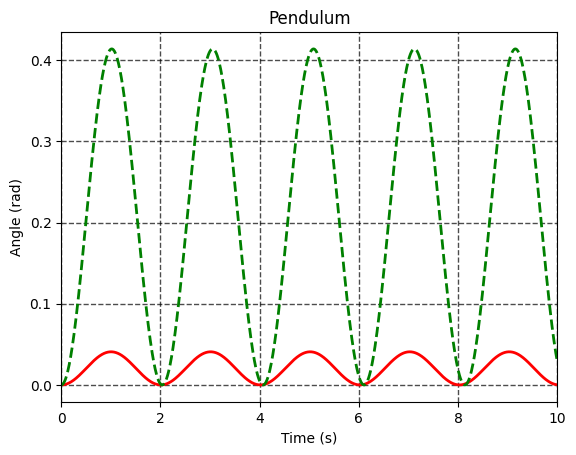

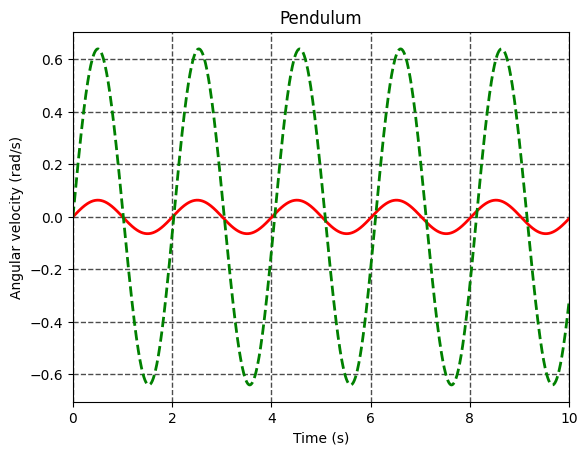

In [31]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def PendulumNonlinear(theta,t,m,l,g,Te):
    dth1 = theta[1]
    dth2 = -g/l*np.sin(theta[0]) +1/(m*l*l)*Te(t)
    return [dth1, dth2]

m = 0.1;
l = 1;
g = 9.8;

A = np.array([[0,1],[-g/l, 0]])
B = np.array([[0],
             [1]])
D = np.array([0])
C = np.array([[1,0],[0,1]])
R = np.array([0])

t0 = 0  # Initial time 
tf = 10  # Final time
T = np.linspace(t0, tf, 1000)  # Time vector

def w_func(t):
    return 0.0 # Disturbance input
    
def u_func(t):
    return 0.2 # Control input

x0 = np.array([0, 0]).flatten() # Initial state

# Compute system response
y = OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_func, T, x0)

y1 = odeint(PendulumNonlinear, x0, T, args=(m,l,g, u_func))

# Plot the response
plt.plot(T, y[0,:], linewidth=2.0, color='red')
plt.plot(T, y1[:,0], linewidth=2.0, linestyle='--',color='green')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Angle (rad)')
plt.xlabel('Time (s)')
plt.title('Pendulum')
plt.show()

plt.plot(T, y[1,:], linewidth=2.0, color='red')
plt.plot(T, y1[:,1], linewidth=2.0, linestyle='--',color='green')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Angular velocity (rad/s)')
plt.xlabel('Time (s)')
plt.title('Pendulum')
plt.show()

## Answers for the Question 4

1) For small angles $\theta[0.1,0]$, the Taylor approximation $\sin(\theta) \approx \theta$ is extremely accurate. The linear model is a faithful representation of the physical reality of the system in this region. But, for biger angles $\theta[1,0]$ the graphs begin to diverge, witch means that the linear model generally exhibits a higher oscillation frequency and an amplitude that does not perfectly match the non-linear model as time passes.

2) 
### Control input = 0.1 
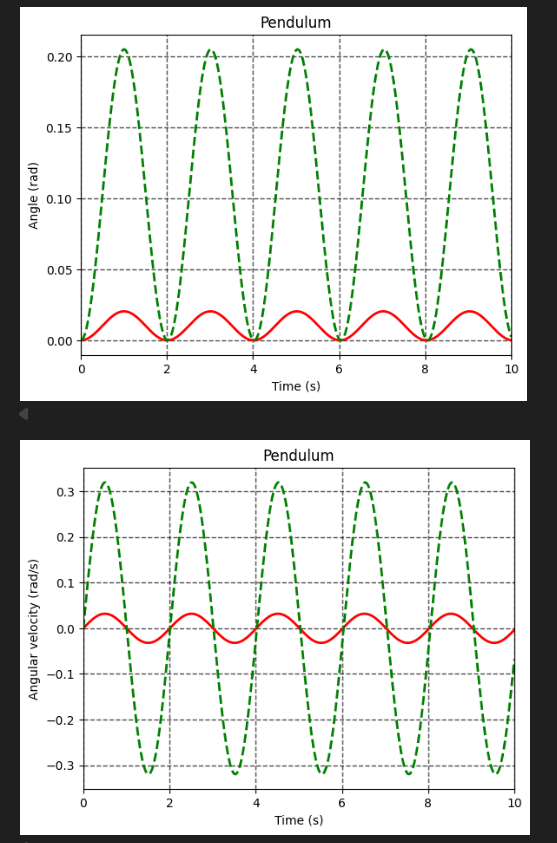

### Control input = 0.7
![Captura de tela 2026-02-05 160911.png](<attachment:Captura de tela 2026-02-05 160911.png>)

### Control input = 0.8
![Captura de tela 2026-02-05 160948.png](<attachment:Captura de tela 2026-02-05 160948.png>)

Based on the simulations, I found that for a small control input like 0.1, the linear and non-linear systems behave almost exactly the same. This happens because the pendulum stays close to the equilibrium point where the linear approximation is valid. However, when I increased the input to 0.7 and 0.8, the two trajectories started to diverge significantly. This shows that the linear model is only accurate for small movements; as soon as the input forces the pendulum to larger angles, the linear math fails to represent the real physics of the system.
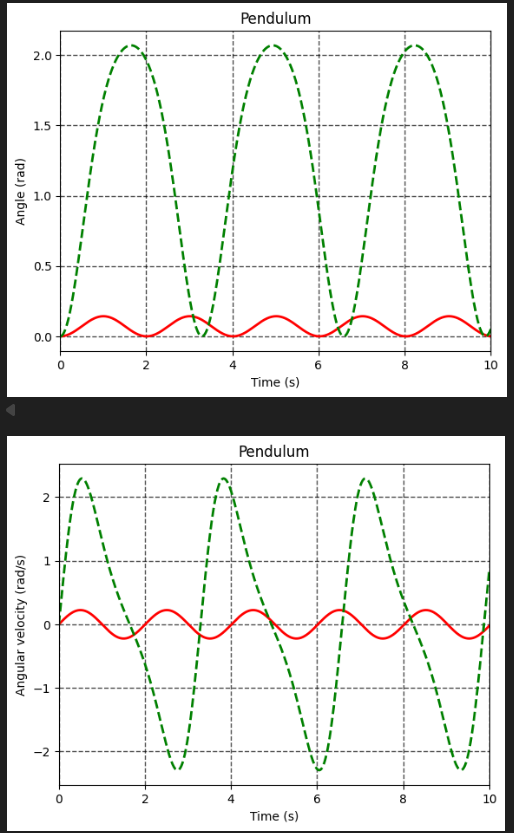
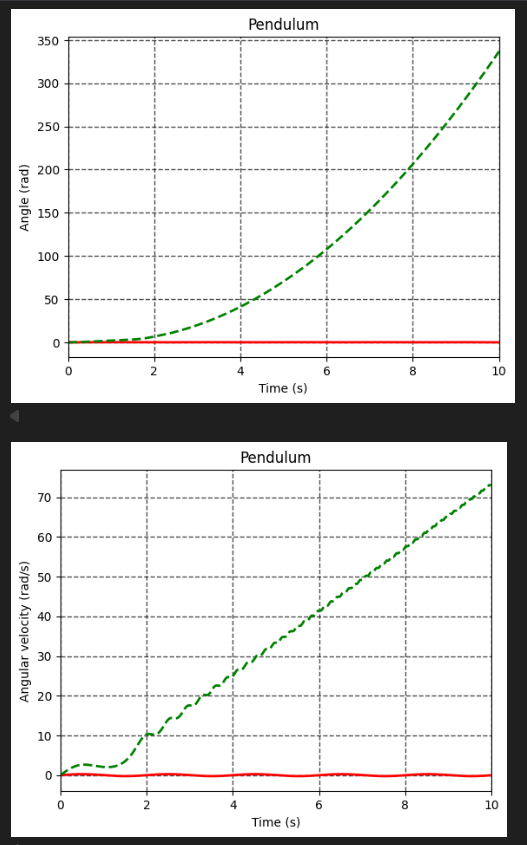

## Ex 4. Dynamic modeling of an inverted pendulum on the cart

The system in this example consists of an inverted pendulum mounted to a motorized cart. The inverted pendulum system is an example commonly found in control system textbooks and research literature. Its popularity derives in part from the fact that it is unstable without control, that is, the pendulum will simply fall over if the cart isn't moved to balance it. Additionally, the dynamics of the system are nonlinear. The objective of the control system is to balance the inverted pendulum by applying a force to the cart that the pendulum is attached to. A real-world example that relates directly to this inverted pendulum system is the attitude control of a booster rocket at takeoff.

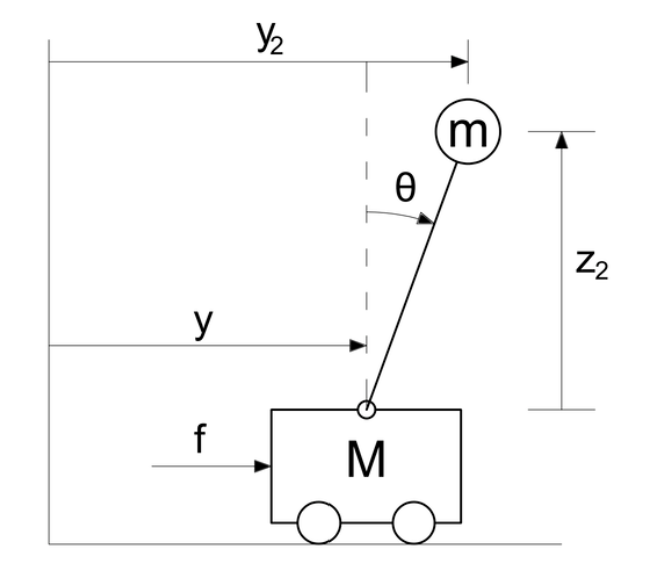

Let us consider the system with the following system parameters
    
    (M)       mass of the cart                         0.5 kg
    
    (m)       mass of the pendulum                     0.2 kg
    
    (l)       length to pendulum center of mass        0.3 m
    
    (b)       coefficient of friction for cart         0.1 N/m/sec
    
    (I)       mass moment of inertia of the pendulum   0.006 kg.m^2
    
    (F)       force applied to the cart
    
    (y)       cart position coordinates
    
    (theta)   angle between the pendulum and the vertical axis

## TODO
1) Show that the inverted pendulum on the cart can be modeled as follows

$$(M+m)\ddot{y} + b\dot{y} + ml\ddot{\theta}\cos\theta -ml\dot\theta^2\sin(\theta) = F$$
$$ml\cos(\theta)\ddot{y} + (I+ml^2)\ddot{\theta} - mgl\sin\theta = 0$$

If you find it difficult to derive the equations yourself, please, watch the following video: 
https://www.youtube.com/watch?v=kXLjs5aW2uE

or, alternatively, check the following tutorial https://ctms.engin.umich.edu/CTMS/index.php?example=InvertedPendulum&section=SystemModeling

2) Rewrite the system equation in a canonical form $\dot x = f(x,u),$ where state vector $x = (y,\theta,\dot y,\dot\theta)$.

3) Find an equlibrium point. Linearise the system equations by finding the Jacobian matrix.

4) Simulate trajectories of the uncontrolled nonlinear system and its linear approximation for different initial vectors. What can you say about system dynamics?


![WhatsApp Image 2026-02-05 at 22.48.51.jpeg](<attachment:WhatsApp Image 2026-02-05 at 22.48.51.jpeg>)

![WhatsApp Image 2026-02-05 at 22.31.46.jpeg](<attachment:WhatsApp Image 2026-02-05 at 22.31.46.jpeg>)

![WhatsApp Image 2026-02-05 at 22.32.09.jpeg](<attachment:WhatsApp Image 2026-02-05 at 22.32.09.jpeg>)
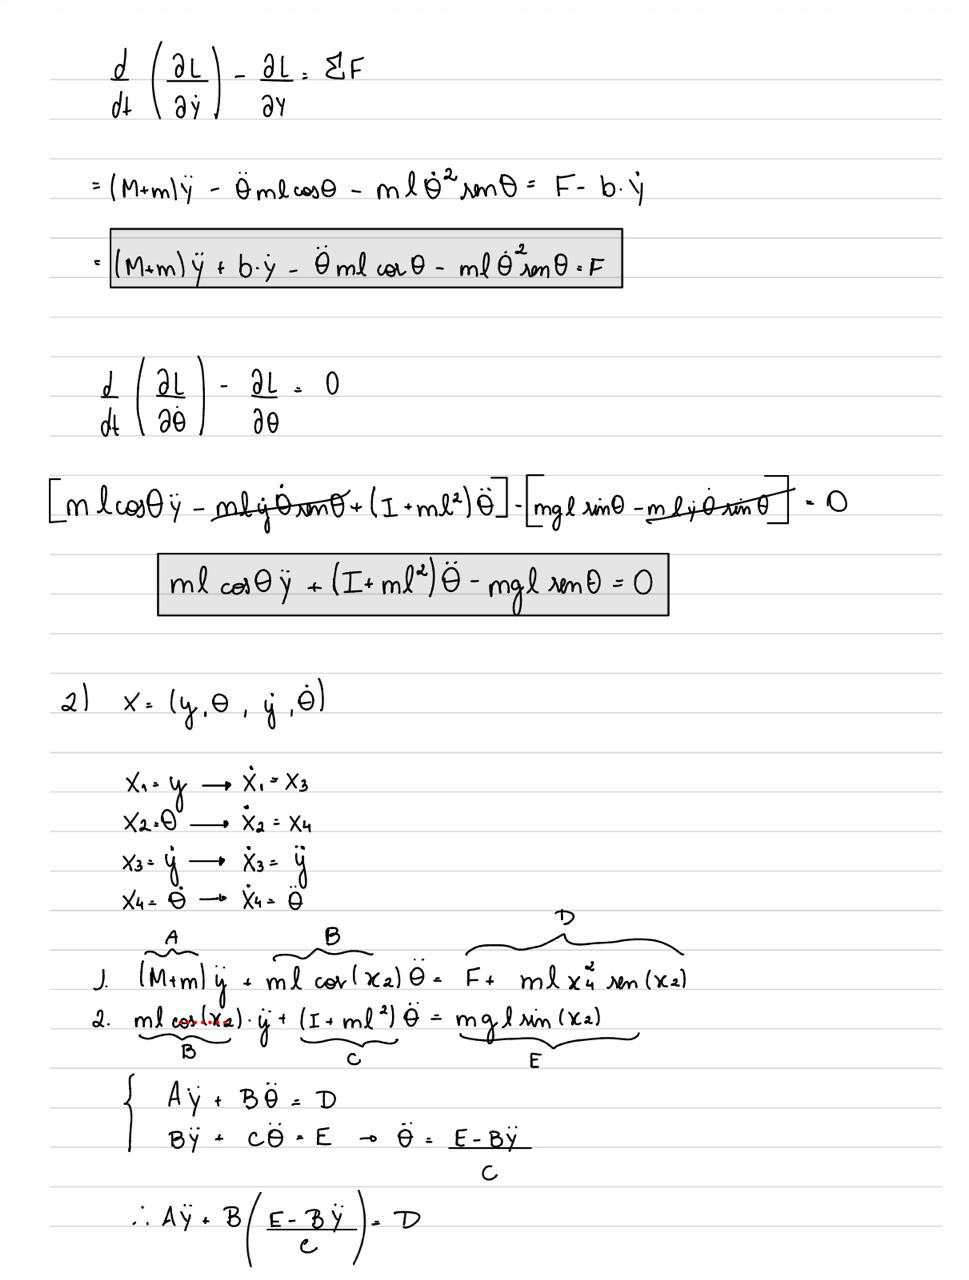
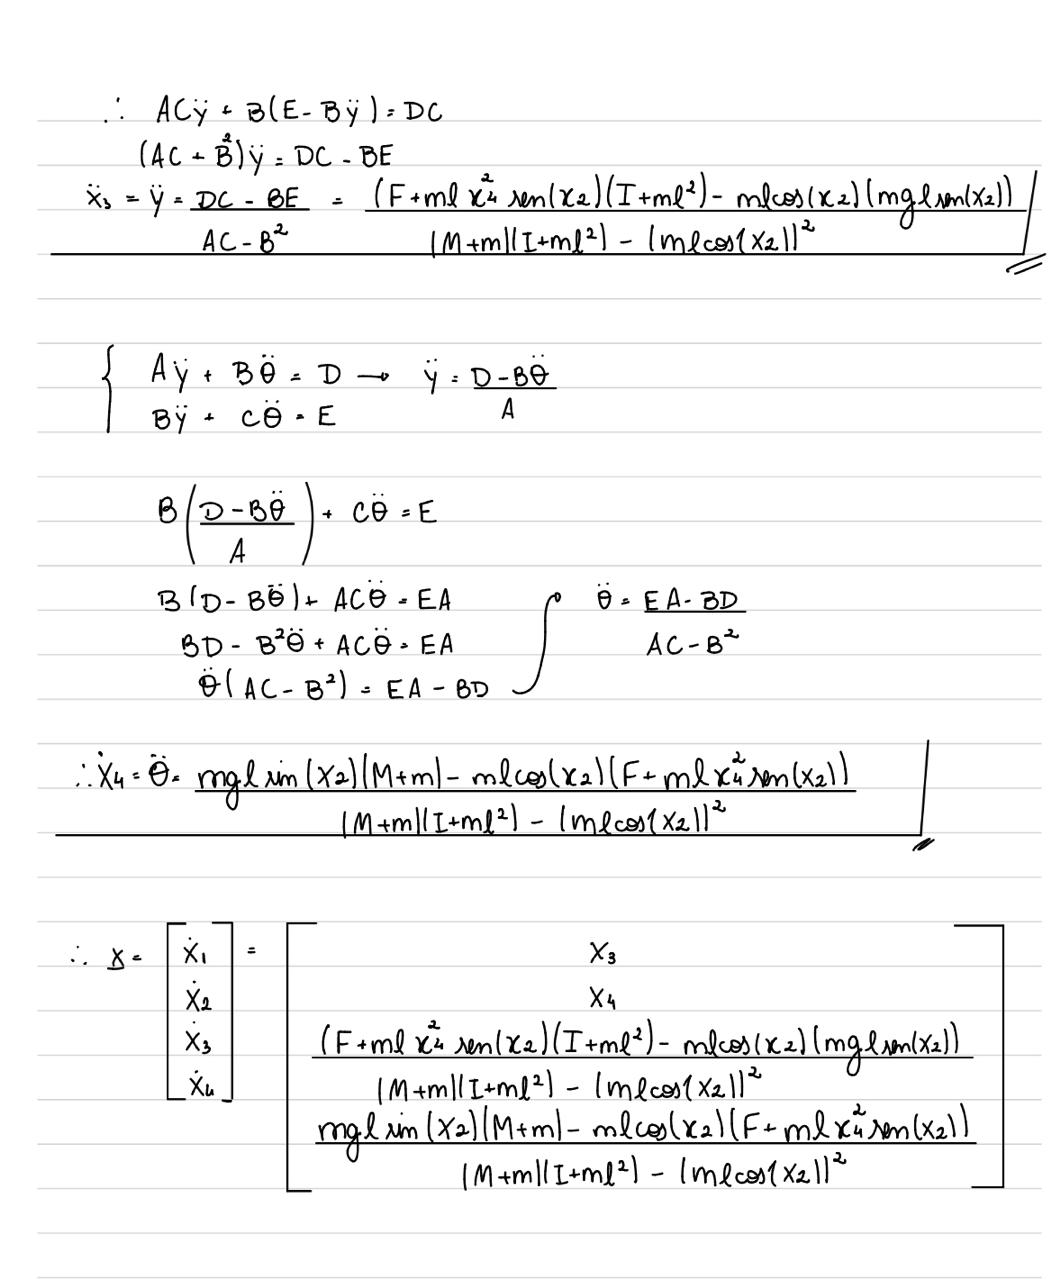
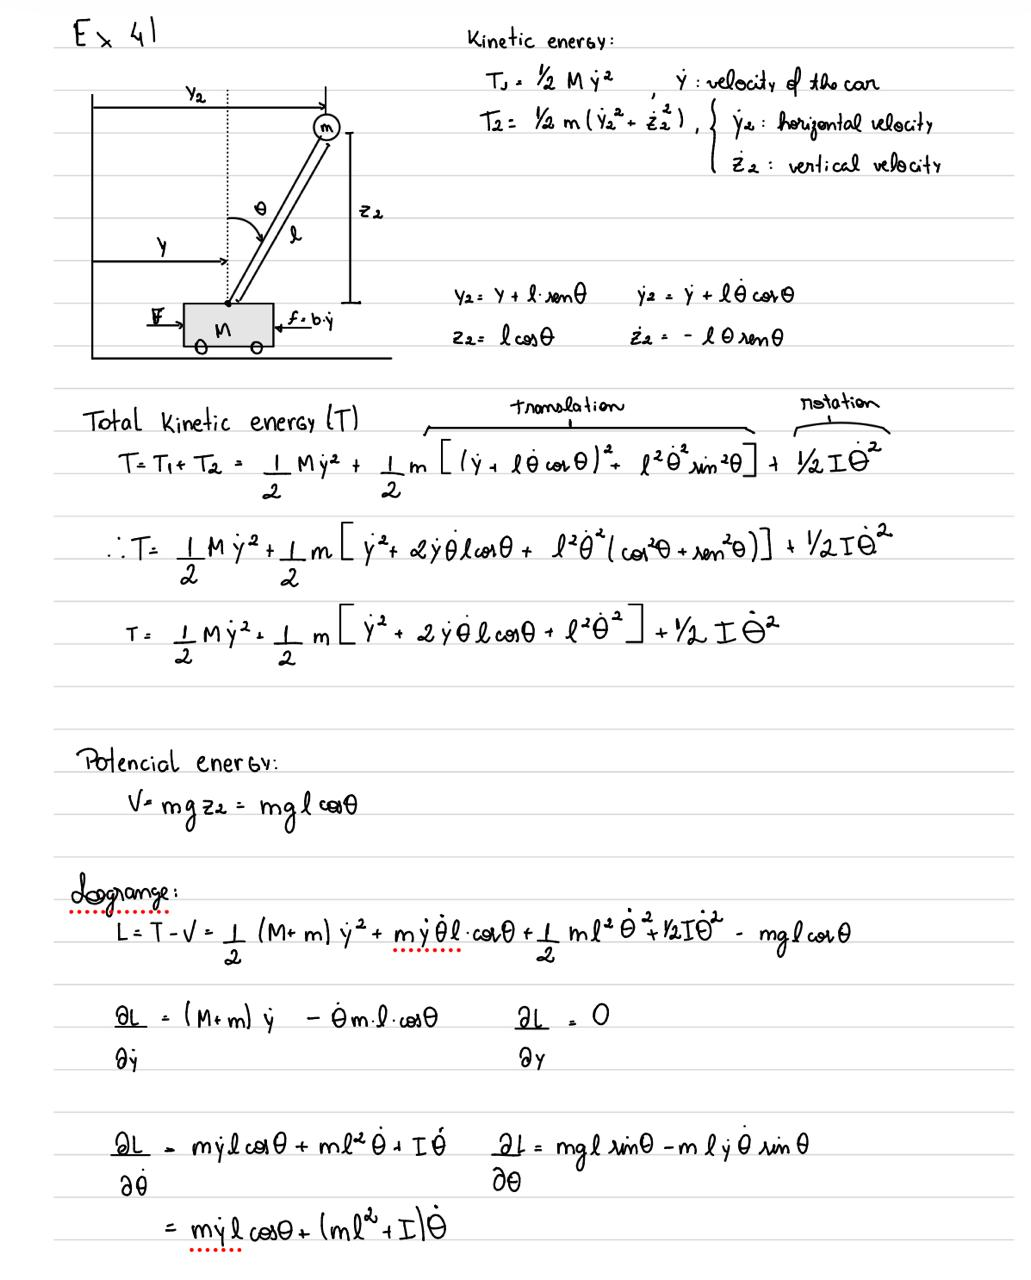

In [ ]:
import sympy as sp
from IPython.display import display, Math

# Setup for beautiful LaTeX printing in Jupyter
sp.init_printing(use_latex='mathjax')

# 1. Define symbolic parameters and state variables
# M: cart mass, m: pendulum mass, l: length to COM, I: inertia, g: gravity, u: control input
M, m, l, I, g, u = sp.symbols('M m l I g u')
x1, x2, x3, x4 = sp.symbols('x1 x2 x3 x4')

# Common denominator extracted from the system equations provided in the image
denominator = (M + m)*(I + m*l**2) - (m*l*sp.cos(x2))**2

# 2. Define state derivative equations f(x, u) = [x1_dot, x2_dot, x3_dot, x4_dot]^T
f1 = x3
f2 = x4
f3 = ((I + m*l**2)*(u + m*l*x4**2*sp.sin(x2)) - m**2*g*l**2*sp.sin(x2)*sp.cos(x2)) / denominator
f4 = (-m*l*sp.cos(x2)*(u + m*l*x4**2*sp.sin(x2)) + (M + m)*m*g*l*sp.sin(x2)) / denominator

# State vector and Function vector
F = sp.Matrix([f1, f2, f3, f4])
X = sp.Matrix([x1, x2, x3, x4])

# 3. Calculate Jacobian Matrices (Linearization)
# A = partial derivative of F with respect to states X
# B = partial derivative of F with respect to input u
A_jac = F.jacobian(X)
B_jac = F.jacobian([u])

# 4. Define the Equilibrium Point (Upright position: x2=0, Stopped: x3=x4=0, No input: u=0)
eq_point = {x2: 0, x3: 0, x4: 0, u: 0}

# Evaluate the Jacobians at the equilibrium point and simplify terms
A_linear = sp.simplify(A_jac.subs(eq_point))
B_linear = sp.simplify(B_jac.subs(eq_point))

# 5. Output the results using LaTeX rendering
print("Linearized System Matrices at the Upright Equilibrium:")
display(Math(r'A = ' + sp.latex(A_linear)))
display(Math(r'B = ' + sp.latex(B_linear)))

Equilíbrio: Pêndulo na Vertical Superior (Instável)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

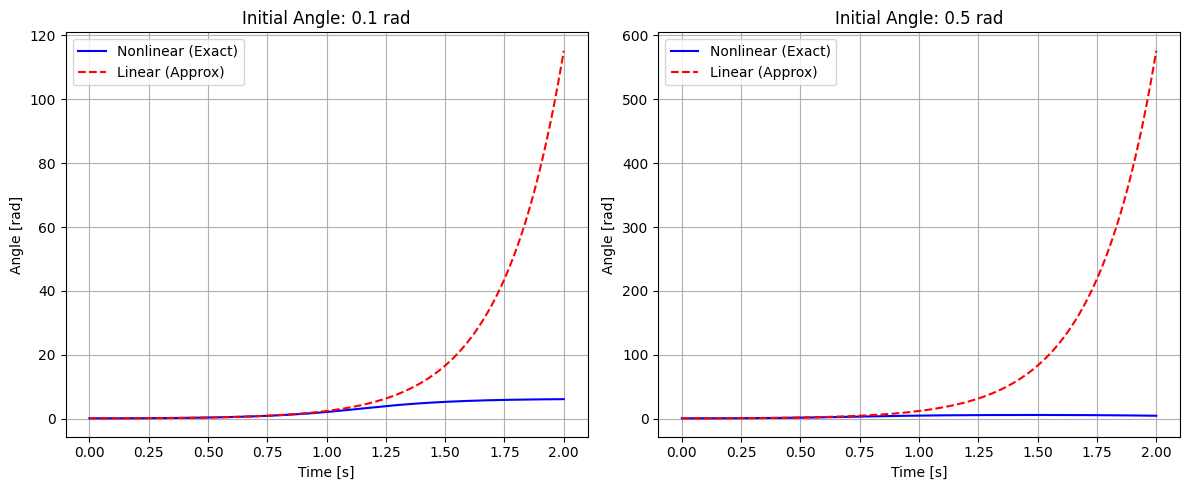

In [ ]:
#4) 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- 1. Physical Parameters ---
M, m, l, I, g = 1.0, 0.1, 0.5, 0.01, 9.81

# --- 2. Numerical Linearization (Matrix A) ---
# Evaluated at the upright equilibrium (x2 = 0)
p = (M + m)*(I + m*l**2) - (m*l)**2
A = np.array([
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, -(m**2 * g * l**2) / p, 0, 0],
    [0, (M + m) * m * g * l / p, 0, 0]
])

# --- 3. System Definitions ---
def nonlinear_system(t, x):
    x1, x2, x3, x4 = x
    u = 0  # Uncontrolled
    
    # Denominator from the image
    det = (M + m)*(I + m*l**2) - (m*l*np.cos(x2))**2
    
    # ODEs from the image
    dx1 = x3
    dx2 = x4
    dx3 = ((I + m*l**2)*(u + m*l*x4**2*np.sin(x2)) - m**2*g*l**2*np.sin(x2)*np.cos(x2)) / det
    dx4 = (-m*l*np.cos(x2)*(u + m*l*x4**2*np.sin(x2)) + (M + m)*m*g*l*sp.sin(x2)) / det # Using sp.sin for symbolic if needed, but here np.sin
    # Corrected for numpy:
    dx4 = (-m*l*np.cos(x2)*(u + m*l*x4**2*np.sin(x2)) + (M + m)*m*g*l*np.sin(x2)) / det
    
    return [dx1, dx2, dx3, dx4]

def linear_system(t, x):
    return A @ x

# --- 4. Simulation Settings ---
t_span = (0, 2)
t_eval = np.linspace(0, 2, 500)
# Test cases: Small perturbation (0.1 rad) vs Large perturbation (0.5 rad)
initial_conditions = [[0, 0.1, 0, 0], [0, 0.5, 0, 0]] 

# --- 5. Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, x0 in enumerate(initial_conditions):
    sol_nl = solve_ivp(nonlinear_system, t_span, x0, t_eval=t_eval)
    sol_lin = solve_ivp(linear_system, t_span, x0, t_eval=t_eval)
    
    axes[i].plot(sol_nl.t, sol_nl.y[1], 'b-', label='Nonlinear (Exact)')
    axes[i].plot(sol_lin.t, sol_lin.y[1], 'r--', label='Linear (Approx)')
    axes[i].set_title(f'Initial Angle: {x0[1]} rad')
    axes[i].set_xlabel('Time [s]')
    axes[i].set_ylabel('Angle [rad]')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

The inverted pendulum on a cart is inherently unstable in its upright position, as evidenced by the state trajectories diverging exponentially even with minute initial perturbations. From the simulation, we observe that for small initial vectors (e.g., $x_2 = 0.1$ rad), the linear approximation tracks the nonlinear system with high fidelity because the small-angle approximations ($\sin(\theta) \approx \theta$ and $\cos(\theta) \approx 1$) hold true. However, as the initial deviation increases (e.g., $x_2 = 0.5$ rad), the nonlinear trigonometric terms and centrifugal forces ($x_4^2 \sin(x_2)$) become significant, causing the linear model to drift and fail to predict the actual physical behavior. 